In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Create a new model by adding fully connected layers
model = Sequential()


model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:

# Freeze the weights of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model with a SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/flowers/TRAIN/', target_size=(100, 100), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/flowers/TEST/', target_size=(100, 100), batch_size=32, class_mode='categorical')


Found 7349 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [ ]:
# Train the model
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))


<ipython-input-10-d5262ae614af>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))


Epoch 1/10
230/230 [==============================] - 81s 350ms/step - loss: 0.6179 - accuracy: 0.7801 - val_loss: 0.5962 - val_accuracy: 0.7783
Epoch 2/10
230/230 [==============================] - 79s 343ms/step - loss: 0.6152 - accuracy: 0.7839 - val_loss: 0.5764 - val_accuracy: 0.7942
Epoch 3/10
230/230 [==============================] - 80s 348ms/step - loss: 0.5947 - accuracy: 0.7930 - val_loss: 0.5774 - val_accuracy: 0.7983
Epoch 4/10
230/230 [==============================] - 84s 367ms/step - loss: 0.5973 - accuracy: 0.7808 - val_loss: 0.5728 - val_accuracy: 0.8008
Epoch 5/10
230/230 [==============================] - 89s 384ms/step - loss: 0.5807 - accuracy: 0.7917 - val_loss: 0.5871 - val_accuracy: 0.7900
Epoch 6/10
230/230 [==============================] - 83s 361ms/step - loss: 0.5804 - accuracy: 0.7891 - val_loss: 0.5608 - val_accuracy: 0.8042
Epoch 7/10
230/230 [==============================] - 84s 367ms/step - loss: 0.5674 - accuracy: 0.7998 - val_loss: 0.5784 - val_ac

In [ ]:
# Evaluate the model on the test set
score = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-11-4627af2e8f2f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.6044105291366577
Test accuracy: 0.7975000143051147


In [ ]:
#Save model
model.save('/content/drive/MyDrive/AI/models/Hoa.h5')

In [1]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/models/Hoa.h5')

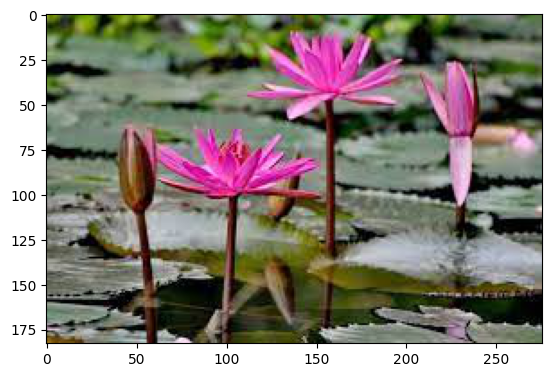

In [6]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'hoasung.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 131ms/step


array([4])

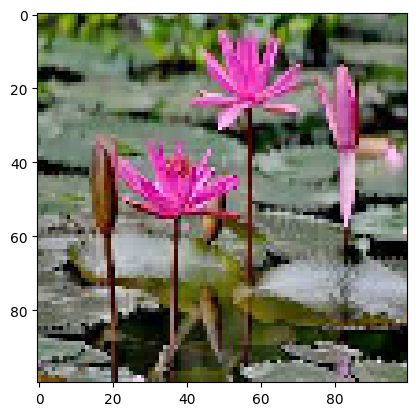

In [7]:
img = load_img(url, target_size = (100,100))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)